In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
from lgca import get_lgca
from copy import deepcopy
from operator import itemgetter

In [24]:
# An example initial nodes 
L = 200
k = 3 #number of channels
init_nodes_filled = 10
init_channel_pop = 2
nodes = np.empty(L*k,dtype=object)
for i in range(init_nodes_filled*k):
    nodes[i] = [init_channel_pop*i+j+1 for j in range(init_channel_pop)]
for i in range((L-init_nodes_filled)*k):
    nodes[i+init_nodes_filled*k] = []
newnodes = nodes.reshape(L,k)
newnodes.shape
maxlabel = k*init_nodes_filled*init_channel_pop

In [28]:
#better to provide a maxlabel(which the max cell ID)

#lgca = get_lgca(geometry = '1d',dims=1000, ib=True, ve = True, ini_channel_pop = 2, capacity = 8, bc='reflecting', interaction = 'go_or_grow', kappa = 0.0, theta = 0.5)
#lgca.timeevo(timesteps = 200, recordnodespop = True, record=False)

lgca = get_lgca(geometry = '1d',dims=L, ib=True, ve = True, nodes=newnodes, maxlabel=maxlabel, ini_channel_pop = init_channel_pop, capacity = 4, bc='reflecting', interaction = 'go_or_grow', kappa = 0.0, theta = 0.5)
lgca.timeevo(timesteps = 2000, recordnodespop = True, record=True)

death rate set to r_d =  0.01
birth rate set to r_b =  0.2
Progress: [####################] 100% Done...


<IPython.core.display.Javascript object>


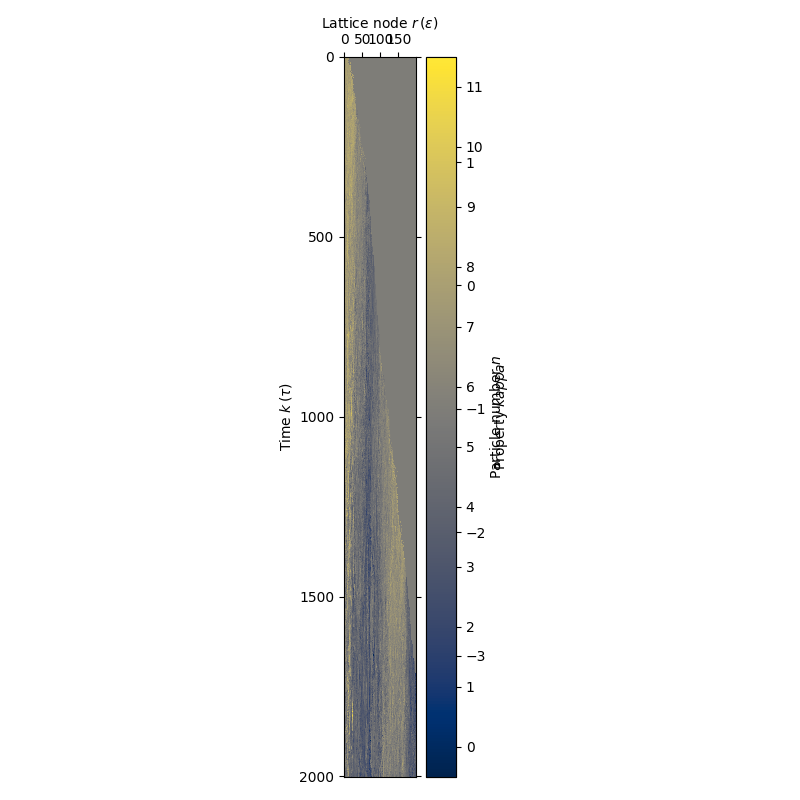

In [29]:
lgca.plot_nodes_population()

<IPython.core.display.Javascript object>


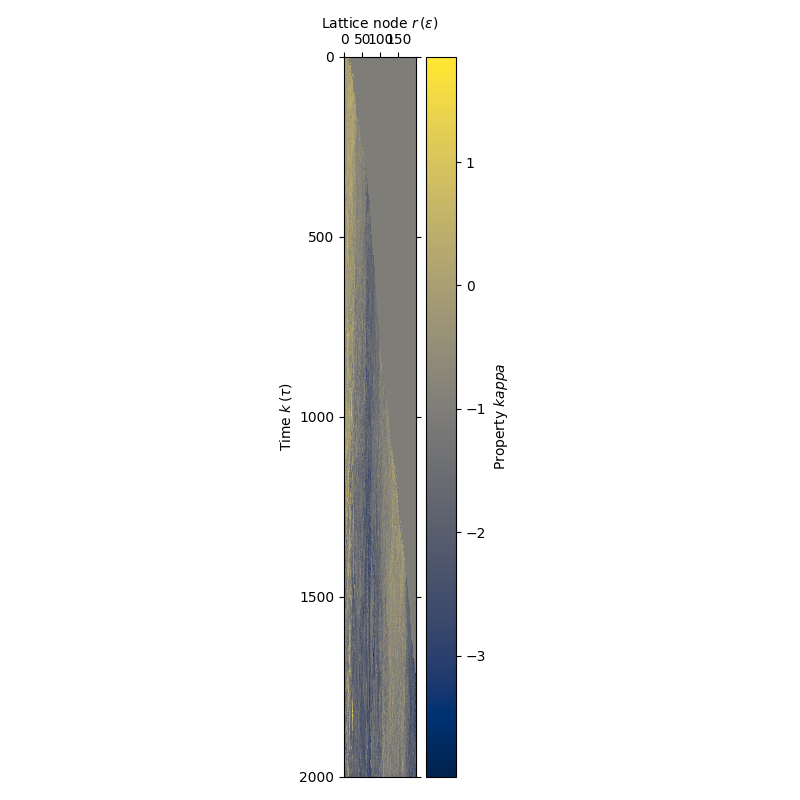

In [31]:
lgca.plot_prop_spatial(propname='kappa')


In [1]:
k = lgca.props['kappa']
cells = [12, 3, 500]
print(itemgetter(*cells)(k))

NameError: name 'lgca' is not defined

In [28]:
propname = 'kappa'
mean_prop = np.ones(L)*-1
counter = 0
for node in lgca.nodes:
    cells = []
    for channel in node:
        cells.extend(channel)
    if cells != []:
        props = np.array(itemgetter(*cells)(lgca.props[propname]))
        mean_prop[counter]=props.mean()
    counter+=1
mean_prop

array([-1.49454962, -0.96010009, -1.34717532, -1.00206335, -0.6989648 ,
       -1.02277948, -0.91757784,  0.16759012, -0.72282019, -0.77545753,
       -0.37412257, -0.91562571, -0.85075072, -0.84417663, -0.7457592 ,
       -1.13205898, -0.8861992 , -1.15915845, -0.41332106, -0.91181746,
       -1.29774964, -1.53980783, -0.67265853, -1.38654553, -1.08659772,
       -1.32876895, -1.09100394, -0.87456221, -1.11297659, -1.1059078 ,
       -1.23755408, -1.33878006, -1.24208403, -1.05168366, -1.17040485,
       -0.73613213, -1.48042108, -1.30805286, -1.00586269, -0.84304785,
       -1.20764342, -1.41293677, -0.96227104, -1.31935328, -1.58937751,
       -0.95035754, -0.98900449, -1.18024599, -0.95179108, -1.59836074,
       -1.44056586, -1.08763933, -0.97298925, -1.36377015, -1.23292554,
       -1.35081061, -0.49736367, -0.46962655,  0.04578024, -1.17713224,
       -0.80825369, -1.39827601, -1.55696298, -1.84222883, -1.87864161,
       -1.29612203, -1.73772687, -1.98627398, -1.92921513, -1.99

In [ ]:
lgca.nodespop_t

In [ ]:
lgca.nodes.shape

In [ ]:
lgca.props['kappa']

In [ ]:
lgca.props.items()
lengths = [len(value) for key, value in lgca.props.items()][0]
lengths

In [ ]:
lgca.nodes[3][0].append(3)

In [ ]:
#nodescopy = np.empty(lgca.l*lgca.K, dtype=object)
#for k in range(lgca.l*lgca.K):
#    nodescopy[k] = [0]
#nodescopy.reshape((lgca.l, lgca.K))
nodescopy = deepcopy(lgca.nodes)
nodescopy[:,2:]
#nodescopy[:, 2:] = lgca.nodes[:, 2:]
nodescopy[1:, 0] = lgca.nodes[:-1, 1]
nodescopy[:-1, 1] = lgca.nodes[1:, 0]
lgca.nodes = deepcopy(nodescopy)
nodescopy




In [ ]:
lgca.nodes_pop
lgca.capacity



In [ ]:
def tanh_switch(rho, kappa=5., theta=0.8):
    return 0.5 * (1 + np.tanh(kappa * (rho - theta)))

In [ ]:
for node in lgca.nodes:
    channel_counter = 1
    for channel in node:
        for cell in channel:
            if(np.random.random() < 0.1):
                channel.remove(cell) 
            if(cell in channel):
                if(np.random.random() < tanh_switch(rho=(len(channel)/lgca.capacity), kappa=0.5, theta=lgca.props['theta'][cell])):
                    #switch to rest
                    node[2].append(cell)
                    channel.remove(cell)
                else:
                    #switch to moving + reorientation 
                    node[np.random.randint(2)].append(cell)
                    channel.remove(cell)
        if(channel_counter%3 == 0):
            rho = len(channel)/lgca.capacity
            for cell in channel:
                if(np.random.random()<0.2*(1-rho)):
                    lgca.calc_max_label()
                    lgca.props['kappa'].append(np.random.normal(loc=lgca.props['kappa'][cell], scale = 0.2))
                    lgca.props['theta'].append(np.random.normal(loc=lgca.props['theta'][cell], scale = 0.2))
                    channel.append(lgca.maxlabel)
        channel_counter += 1
lgca.nodes

In [ ]:
lgca.props['theta']

In [ ]:
total_pop = sum(lgca.nodes_pop)
total_pop
dying = np.random.random(size = total_pop) < 0.2
dying

#reproducible = sum(lgca.channel_pop[:,2])
#reproducible
dying.astype(int)

In [ ]:
length_checker = np.vectorize(len)
length_checker(lgca.nodes)

In [ ]:
 def init_nodes(self, ini_channel_pop, nodes=None):
        #self.nodes = np.zeros((self.l + 2 * self.r_int, self.K), dtype=np.uint)
        if nodes is None:
            nodes = np.empty((self.l+2*self.r_int)*self.K, dtype=object)
            for k in range((self.l+2*self.r_int)*self.K):
                nodes[k] = [ini_channel_pop*k+i+1 for i in range(ini_channel_pop)]
            #for j in range(self.r_int*self.K):
            #    nodes[j] = []
            #    nodes[-j] = []
            self.nodes = nodes.reshape((self.l+2*self.r_int,self.K))
            self.maxlabel = (self.l+2*self.r_int)*self.K*ini_channel_pop
            print(self.maxlabel)
        else:
            #to be implemented
            occ = nodes > 0
            self.nodes[self.r_int:-self.r_int] = self.convert_bool_to_ib(occ)
            self.maxlabel = self.nodes.max()